In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
df= pd.read_csv('/content/wine_food_pairings.csv')

In [67]:
df.sample(10)

,wine_type,wine_category,food_item,food_category,cuisine,pairing_quality,quality_label,description
6333,Cava,Sparkling,bbq brisket,Red Meat,Argentinian,1,Terrible,Deliberately bad pairing example for contrast.
30263,Sauvignon Blanc,White,citrus salad,Acidic,American BBQ,5,Excellent,Acidic wine balances acidic food.
7601,Chardonnay,White,cream of mushroom soup,Creamy,Argentinian,3,Neutral,Richer body matches creamy textures.
15210,Sauternes,Dessert,roast chicken with herbs,Poultry,American BBQ,3,Neutral,Heavy wine can dominate poultry.
13718,Pinot Noir,Red,mac and cheese,Cheese,German,2,Poor,Heuristic pairing assessment.
29576,Nebbiolo,Red,grilled salmon,Seafood,American BBQ,5,Excellent,Idealized perfect pairing example for contrast.
5395,Viognier,White,carbonara,Pork,American BBQ,3,Neutral,Richer body matches creamy textures.
20096,Viognier,White,carbonara,Creamy,Italian,1,Terrible,Deliberately bad pairing example for contrast.
13623,Nebbiolo,Red,carbonara,Creamy,Greek,5,Excellent,Idealized perfect pairing example for contrast.
7939,Grenache,Red,charcuterie board,Salty Snack,Korean,4,Good,Heuristic pairing assessment.


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34933 entries, 0 to 34932
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   wine_type        34933 non-null  object
 1   wine_category    34933 non-null  object
 2   food_item        34933 non-null  object
 3   food_category    34933 non-null  object
 4   cuisine          34933 non-null  object
 5   pairing_quality  34933 non-null  int64 
 6   quality_label    34933 non-null  object
 7   description      34933 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [69]:
if 'pairing_quality' in df.columns:
    quality_dist = df['pairing_quality'].value_counts().sort_index()
    print(quality_dist)

if 'quality_label' in df.columns:
    print(df.groupby('pairing_quality')['quality_label'].value_counts())

pairing_quality
1    7034
2    6179
3    8108
4    6449
5    7163
Name: count, dtype: int64
pairing_quality  quality_label
1                Terrible         7034
2                Poor             6179
3                Neutral          8108
4                Good             6449
5                Excellent        7163
Name: count, dtype: int64


In [70]:
df['cuisine'].value_counts()

,count
cuisine,
Mexican,2089
Middle Eastern,2075
Thai,2071
Chinese (Sichuan),2068
Moroccan,2068
Vietnamese,2065
Indian,2062
Ethiopian,2059
Korean,2058


In [71]:
df['wine_type'].value_counts()

,count
wine_type,
Sauternes,2452
Ice Wine,2451
Albariño,1725
Grüner Veltliner,1724
Sauvignon Blanc,1675
Nebbiolo,1592
Grenache,1315
Merlot,1309
Viognier,1298


In [72]:
df['wine_category'].unique()

array(['Red', 'Fortified', 'White', 'Dessert', 'Sparkling', 'Rosé'],
      dtype=object)

In [73]:
df['food_item'].value_counts()

,count
food_item,
fondue,2246
mac and cheese,2227
grilled ribeye,2223
cheese platter,2218
beef stew,2215
caprese salad,2071
bbq brisket,1856
roast lamb,1855
gazpacho,1770


In [74]:
df['quality_label'].unique()

array(['Poor', 'Neutral', 'Good', 'Excellent', 'Terrible'], dtype=object)

In [75]:
df['pairing_quality'].unique()

array([2, 3, 4, 5, 1])

In [76]:
df.describe()

,pairing_quality
count,34933.000000
mean,3.015115
std,1.409591
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [77]:
df[['pairing_quality', 'quality_label']].value_counts()

,,count
pairing_quality,quality_label,
3,Neutral,8108
5,Excellent,7163
1,Terrible,7034
4,Good,6449
2,Poor,6179


In [78]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    if col != 'description':  # Skip free-text
        top_5 = df[col].value_counts().head(5)
        print(f"\n{col.upper()}:")
        print(f"  Top 5 categories:")
        for cat, count in top_5.items():
            print(f"    • {cat}: {count} ({count/len(df)*100:.1f}%)")


WINE_TYPE:
  Top 5 categories:
    • Sauternes: 2452 (7.0%)
    • Ice Wine: 2451 (7.0%)
    • Albariño: 1725 (4.9%)
    • Grüner Veltliner: 1724 (4.9%)
    • Sauvignon Blanc: 1675 (4.8%)

WINE_CATEGORY:
  Top 5 categories:
    • Red: 12908 (37.0%)
    • White: 11193 (32.0%)
    • Dessert: 4903 (14.0%)
    • Sparkling: 2468 (7.1%)
    • Fortified: 2104 (6.0%)

FOOD_ITEM:
  Top 5 categories:
    • fondue: 2246 (6.4%)
    • mac and cheese: 2227 (6.4%)
    • grilled ribeye: 2223 (6.4%)
    • cheese platter: 2218 (6.3%)
    • beef stew: 2215 (6.3%)

FOOD_CATEGORY:
  Top 5 categories:
    • Red Meat: 8149 (23.3%)
    • Cheese: 6691 (19.2%)
    • Acidic: 5597 (16.0%)
    • Seafood: 2448 (7.0%)
    • Dessert: 2020 (5.8%)

CUISINE:
  Top 5 categories:
    • Mexican: 2089 (6.0%)
    • Middle Eastern: 2075 (5.9%)
    • Thai: 2071 (5.9%)
    • Chinese (Sichuan): 2068 (5.9%)
    • Moroccan: 2068 (5.9%)

QUALITY_LABEL:
  Top 5 categories:
    • Neutral: 8108 (23.2%)
    • Excellent: 7163 (20.5%)
  

In [79]:
def elite_relationship_mining(df):
  if 'wine_category' in df.columns and 'food_category' in df.columns and 'pairing_quality' in df.columns:
        pivot = pd.crosstab(
            df['wine_category'],
            df['food_category'],
            values=df['pairing_quality'],
            aggfunc='mean'
        ).round(2)
        print(pivot)

        combo_quality = df.groupby(['wine_category', 'food_category'])['pairing_quality'].agg(['mean', 'count'])
        combo_quality = combo_quality[combo_quality['count'] >= 5]  # Filter for statistical significance
        top_combos = combo_quality.sort_values('mean', ascending=False).head(10)
        print(top_combos)


In [80]:
top_combos = elite_relationship_mining(df)

food_category  Acidic  Cheese  Creamy  Dessert  Pork  Poultry  Red Meat  \
wine_category                                                             
Dessert          3.37    3.01     NaN     3.27  3.08     2.85      2.82   
Fortified        3.05    3.00     NaN     3.00   NaN      NaN      2.82   
Red              3.29    3.00    2.74      NaN  3.04     3.08      3.03   
Rosé             3.05    3.01     NaN      NaN   NaN      NaN      2.80   
Sparkling        3.27    2.99     NaN      NaN   NaN      NaN      2.81   
White            3.21    2.99    2.92     2.82  3.04     3.15      2.81   

food_category  Salty Snack  Seafood  Smoky BBQ  Spicy  Vegetarian  
wine_category                                                      
Dessert                3.0     2.75        3.0    NaN         3.0  
Fortified              NaN      NaN        NaN    NaN         NaN  
Red                    3.0     2.81        3.0   2.93         3.0  
Rosé                   NaN      NaN        NaN    NaN      

In [81]:
if 'cuisine' in df.columns:
        cuisine_stats = df.groupby('cuisine').agg({
            'pairing_quality': ['mean', 'std', 'count']
        }).round(2)
        cuisine_stats.columns = ['Avg_Quality', 'Std_Dev', 'Sample_Size']
        cuisine_stats = cuisine_stats.sort_values('Avg_Quality', ascending=False)
        print(cuisine_stats.head(15))

        # Statistical significance filter
        print("\n High-Confidence Cuisines (n >= 20):")
        print(cuisine_stats[cuisine_stats['Sample_Size'] >= 20].head(10))

                   Avg_Quality  Std_Dev  Sample_Size
cuisine                                             
American BBQ              3.03     1.41         2049
Indian                    3.03     1.41         2062
Korean                    3.03     1.41         2058
Chinese (Sichuan)         3.02     1.41         2068
Argentinian               3.02     1.41         2045
Moroccan                  3.02     1.41         2068
Thai                      3.02     1.41         2071
Mexican                   3.02     1.42         2089
Ethiopian                 3.01     1.41         2059
Middle Eastern            3.01     1.42         2075
Japanese                  3.01     1.41         2047
Greek                     3.01     1.41         2038
Italian                   3.01     1.41         2042
Spanish                   3.01     1.41         2044
Vietnamese                3.01     1.41         2065

 High-Confidence Cuisines (n >= 20):
                   Avg_Quality  Std_Dev  Sample_Size
cuisine 

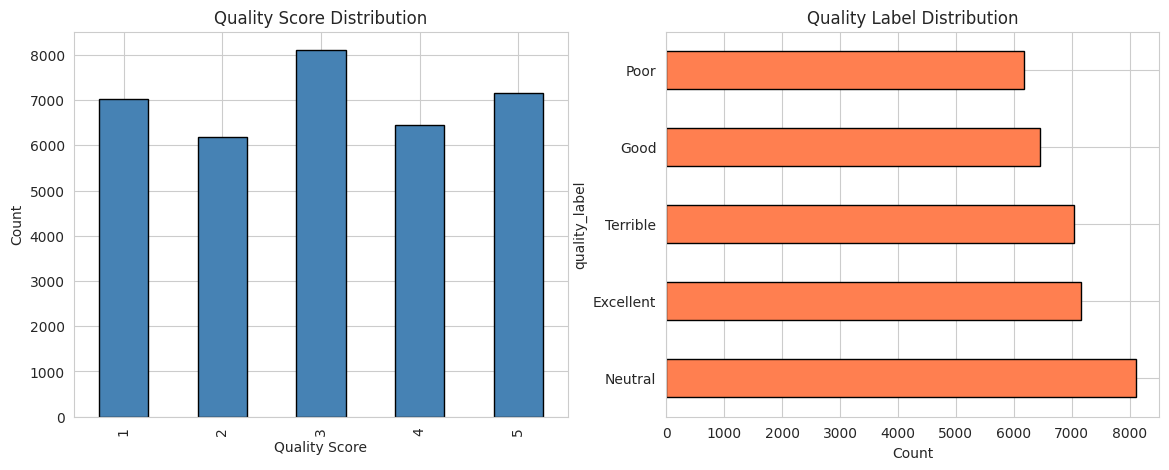

In [82]:
def plot_quality_distribution(df):
    """Quality score distribution"""
    fig, ax = plt.subplots(1, 2, figsize=(14, 5))

    # Numeric scores
    df['pairing_quality'].value_counts().sort_index().plot(kind='bar', ax=ax[0], color='steelblue', edgecolor='black')
    ax[0].set_title('Quality Score Distribution')
    ax[0].set_xlabel('Quality Score')
    ax[0].set_ylabel('Count')

    # Labels
    if 'quality_label' in df.columns:
        df['quality_label'].value_counts().plot(kind='barh', ax=ax[1], color='coral', edgecolor='black')
        ax[1].set_title('Quality Label Distribution')
        ax[1].set_xlabel('Count')

plot_quality_distribution(df)

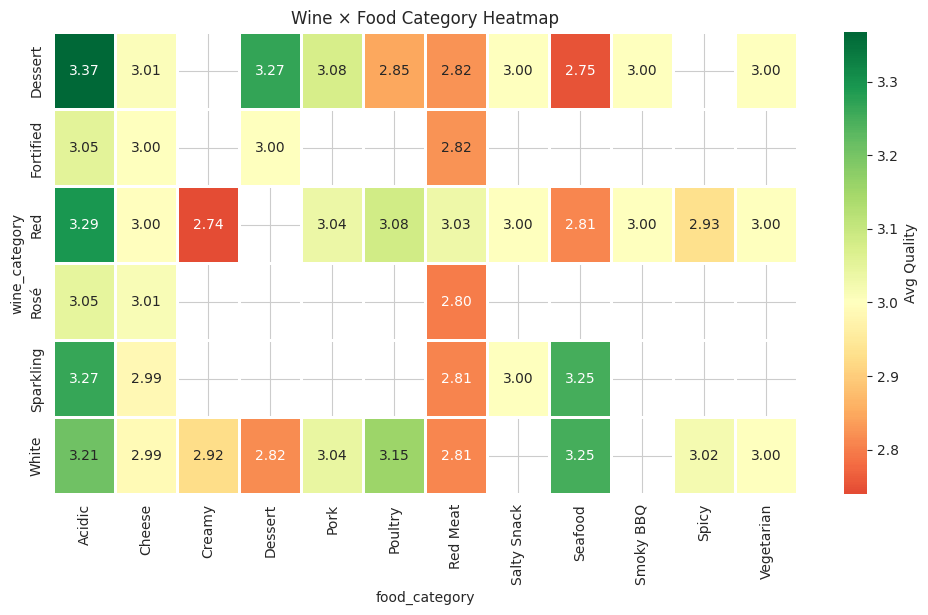

In [83]:
def plot_wine_food_heatmap(df):
    """Wine category vs Food category performance matrix"""
    pivot = pd.crosstab(df['wine_category'], df['food_category'],
                        values=df['pairing_quality'], aggfunc='mean')

    plt.figure(figsize=(12, 6))
    sns.heatmap(pivot, annot=True, fmt='.2f', cmap='RdYlGn', center=3,
                linewidths=1, cbar_kws={'label': 'Avg Quality'})
    plt.title('Wine × Food Category Heatmap')

plot_wine_food_heatmap(df)

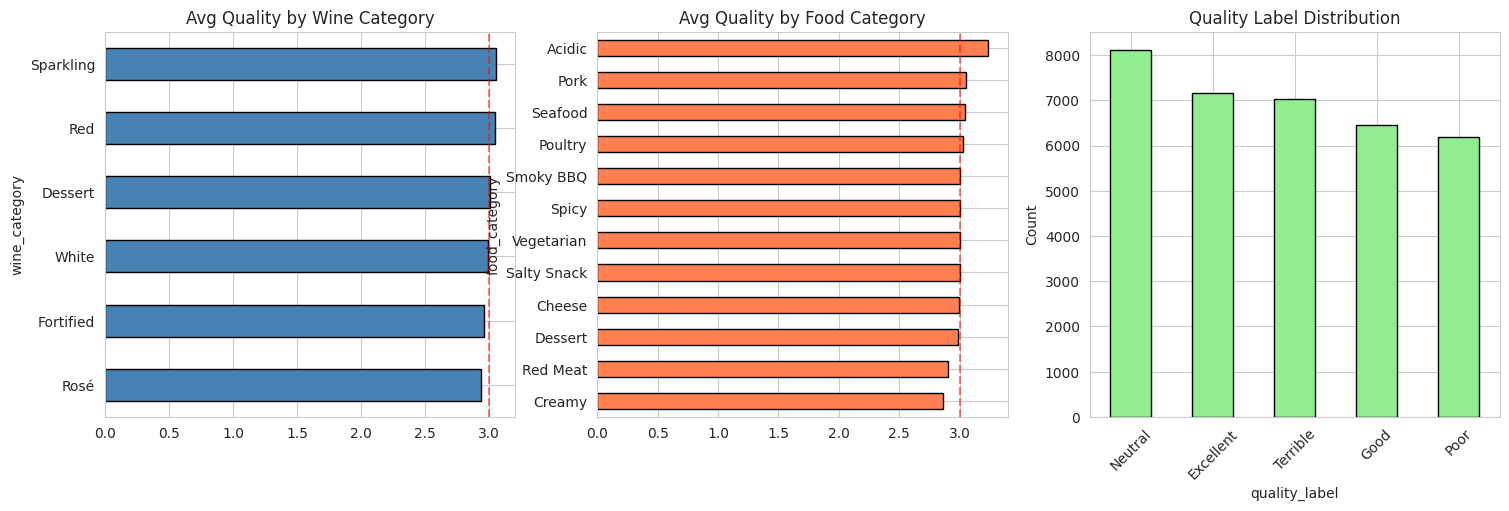

In [84]:
def plot_pairwise_comparison(df):
    """Compare performance across multiple dimensions"""
    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    # Wine category
    wine_cat_avg = df.groupby('wine_category')['pairing_quality'].mean().sort_values()
    wine_cat_avg.plot(kind='barh', ax=ax[0], color='steelblue', edgecolor='black')
    ax[0].set_title('Avg Quality by Wine Category')
    ax[0].axvline(x=3, color='red', linestyle='--', alpha=0.5)

    # Food category
    food_cat_avg = df.groupby('food_category')['pairing_quality'].mean().sort_values()
    food_cat_avg.plot(kind='barh', ax=ax[1], color='coral', edgecolor='black')
    ax[1].set_title('Avg Quality by Food Category')
    ax[1].axvline(x=3, color='red', linestyle='--', alpha=0.5)

    # Quality label counts
    df['quality_label'].value_counts().plot(kind='bar', ax=ax[2], color='lightgreen', edgecolor='black')
    ax[2].set_title('Quality Label Distribution')
    ax[2].set_ylabel('Count')
    ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)


plot_pairwise_comparison(df)